# Data Mining — Linear Regression — Mini-Project 1 (Energy Consumption)

**Course:** [CSEN911] Data Mining (Winter 2025)  
**Instructor:** Dr. Ayman Alserafi  
**Due:** 24 October 2025, 11:59 PM

**Dataset:** `energy_data.csv`  


> **Instructions:** For every step, write your own explanations and justifications and visualization in the provided Markdown prompts.




***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Malak Mohamed Ezzat

ID:58-3123

Tutorial: T14

---

Name: Jana Mahmoud Omran

ID: 58-1046

Tutorial: T14

---


The dataset contains building-level energy readings and contextual attributes.

Each row represents a building observation. Columns include:

<div style="font-size:20px;">

| **Column** | **Description** |
|-------------|-----------------|
| **Building_ID** | Unique identifier for each building record. Used to distinguish one building entry from another. |
| **Building_Type** | Category describing the primary use of the building (e.g., Residential, Commercial, Industrial, Educational, etc.). |
| **Governorate** | The administrative region (governorate) where the building is located (e.g., Cairo, Giza, Alexandria). |
| **Neighborhood** | The smaller district or local area within the governorate where the building is located. |
| **Day_of_Week** | The day on which the energy consumption measurement was recorded (e.g., Sunday, Monday, etc.). |
| **Occupancy_Level** | The relative number of occupants or activity level in the building, typically categorized as *Low*, *Medium*, or *High*. |
| **Appliances_Usage_Level** | Indicates how intensively appliances are used in the building *Low*, *Medium*, or *High*. |
| **SquareFootage** | The total floor area of the building (numeric). Serves as a proxy for building size, often influencing energy usage. |
| **Last_Maintenance_Date** | The date of the last maintainance done on the building. |
| **Average_Temperature** | The average ambient temperature (in °C) recorded during the data period. |
| **Energy_Consumption** | The total energy used by the building, typically measured in kilowatt-hours (kWh).|

</div>


## Importing Libraries & Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv('energy_data.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2025/refs/heads/main/data/energy_data.csv')

df.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,Residential,Alexandria,Smouha,WeDnesday,High,Low,7063m2,2020-01-01,28.61,2713.95 kWh
1,BLD-1001-AX,Commercial,Giza,+Mohandessin14,tuesDAY,High,High,44372m2,2022-02-24,NaN,5744.99 kWh
2,BLD-1002-IH,Industrial,Cairo,New Cairo,SunDay,Medium,Low,19255,2021-02-22,37.88,4101.24 kWh
3,BLD-1003-HE,NaN,NaN,+92Dokki,TuesDay,Low,High,13265,2023-07-30,35.06,3009.14 kWh
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,13375,2022-08-12,28.82,3279.17 kWh


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [ ]:
df.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,Residential,Alexandria,Smouha,WeDnesday,High,Low,7063m2,2020-01-01,28.61,2713.95 kWh
1,BLD-1001-AX,Commercial,Giza,+Mohandessin14,tuesDAY,High,High,44372m2,2022-02-24,NaN,5744.99 kWh
2,BLD-1002-IH,Industrial,Cairo,New Cairo,SunDay,Medium,Low,19255,2021-02-22,37.88,4101.24 kWh
3,BLD-1003-HE,NaN,NaN,+92Dokki,TuesDay,Low,High,13265,2023-07-30,35.06,3009.14 kWh
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,13375,2022-08-12,28.82,3279.17 kWh


In [ ]:
df.head(10)


,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,Residential,Alexandria,Smouha,WeDnesday,High,Low,7063m2,2020-01-01,28.61,2713.95 kWh
1,BLD-1001-AX,Commercial,Giza,+Mohandessin14,tuesDAY,High,High,44372m2,2022-02-24,NaN,5744.99 kWh
2,BLD-1002-IH,Industrial,Cairo,New Cairo,SunDay,Medium,Low,19255,2021-02-22,37.88,4101.24 kWh
3,BLD-1003-HE,NaN,NaN,+92Dokki,TuesDay,Low,High,13265,2023-07-30,35.06,3009.14 kWh
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,13375,2022-08-12,28.82,3279.17 kWh
5,BLD-1005-VX,Commercial,NaN,%9New Cairo,SunDay,Low,Medium,37377m2,2022-07-31,37.54,4687.67 kWh
6,BLD-1006-RC,Industrial,Cairo,Heliopolis_59,saturDAY,High,Low,38638m2,2023-07-07,50.00,5526.83 kWh
7,BLD-1007-SN,Residential,Cairo,New Cairo,tuesDAY,Medium,Low,34950m2,2020-07-29,38.51,4116.32 kWh
8,BLD-1008-BA,Industrial,Alexandria,Gleem(23,MoNday,High,High,29741m2,2024-12-31,43.62,5841.65 kWh
9,BLD-1009-CG,Residential,NaN,=Mohandessin10,FRIDAY,Medium,High,17467,2023-01-14,33.18,3419.13 kWh


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Building_ID             1100 non-null   object 
 1   Building_Type           990 non-null    object 
 2   Governorate             873 non-null    object 
 3   Neighborhood            1100 non-null   object 
 4   Day_of_Week             1100 non-null   object 
 5   Occupancy_Level         1100 non-null   object 
 6   Appliances_Usage_Level  1100 non-null   object 
 7   SquareFootage           1100 non-null   object 
 8   Last_Maintenance_Date   1100 non-null   object 
 9   Average_Temperature     990 non-null    float64
 10  Energy_Consumption      1100 non-null   object 
dtypes: float64(1), object(10)
memory usage: 94.7+ KB


In [ ]:
df.describe()


,Average_Temperature
count,990.000000
mean,33.499404
std,10.703806
min,-4.910000
25%,29.422500
50%,35.260000
75%,39.970000
max,50.000000


In [ ]:
df.describe(include='all')


,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
count,1100,990,873,1100,1100,1100,1100,1100,1100,990.000000,1100
unique,1100,3,3,848,42,3,3,1095,727,NaN,1100
top,BLD-2099-GL,Residential,Alexandria,Smouha,Sunday,High,Low,49653m2,2024-12-31,NaN,4722.59 kWh
freq,1,349,310,45,54,368,381,2,89,NaN,1
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.499404,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.703806,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.910000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.422500,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.260000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.970000,NaN


In [ ]:
df.sort_values('Average_Temperature', ascending=False).head(10)



,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
1024,BLD-2024-ZX,Industrial,Cairo,+13New Cairo,saturday,Medium,Medium,42767m2,2024-06-04,50.0,5508.64 kWh
6,BLD-1006-RC,Industrial,Cairo,Heliopolis_59,saturDAY,High,Low,38638m2,2023-07-07,50.0,5526.83 kWh
1083,BLD-2083-TM,Industrial,Alexandria,Gleem+78,Friday,Medium,Medium,47042m2,2022-12-08,50.0,5900.32 kWh
990,BLD-1990-GY,Industrial,Giza,@Dokki76,Thursday,High,High,48337,2023-12-24,50.0,6458.51 kWh
284,BLD-1284-DI,Industrial,Cairo,=New Cairo79,SUNDAY,Medium,Medium,37930m2,2021-03-16,50.0,5008 kWh
669,BLD-1669-WZ,Industrial,NaN,&Dokki50,monDAY,Medium,High,46039m2,2024-12-31,50.0,5822.52 kWh
209,BLD-1209-OT,Industrial,Cairo,Heliopolis,saturDAY,High,Low,15874m2,2023-04-16,50.0,4318.82 kWh
167,BLD-1167-HF,Industrial,Alexandria,Gleem,Saturday,High,High,37765,2024-07-30,50.0,5879.25 kWh
374,BLD-1374-IK,Industrial,Cairo,Maadi,MONDAY,High,High,29787m2,2024-12-31,50.0,5416.01 kWh
931,BLD-1931-KY,Industrial,Alexandria,Gleem*16,FriDay,High,Low,48802,2024-12-31,50.0,5948.34 kWh


In [ ]:
df.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,Residential,Alexandria,Smouha,WeDnesday,High,Low,7063m2,2020-01-01,28.61,2713.95 kWh
1,BLD-1001-AX,Commercial,Giza,+Mohandessin14,tuesDAY,High,High,44372m2,2022-02-24,NaN,5744.99 kWh
2,BLD-1002-IH,Industrial,Cairo,New Cairo,SunDay,Medium,Low,19255,2021-02-22,37.88,4101.24 kWh
3,BLD-1003-HE,NaN,NaN,+92Dokki,TuesDay,Low,High,13265,2023-07-30,35.06,3009.14 kWh
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,13375,2022-08-12,28.82,3279.17 kWh


## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [ ]:
text_cols = ['Building_Type', 'Governorate', 'Neighborhood',
             'Day_of_Week', 'Occupancy_Level', 'Appliances_Usage_Level']

for col in text_cols:
    df[col] = df[col].astype(str).str.strip().str.lower()


text_cols lists all columns containing text (not numbers or dates).

for col in text_cols: tells Python to clean each of these columns one by one.

astype(str) makes sure every value is a string (text), even if some are NaN or numbers.

.str.strip() removes unwanted spaces at the beginning or end of text.

.str.lower() makes everything lowercase (so “WeDnesday” → “wednesday”).


In [ ]:
df.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,residential,alexandria,smouha,wednesday,high,low,7063m2,2020-01-01,28.61,2713.95 kWh
1,BLD-1001-AX,commercial,giza,+mohandessin14,tuesday,high,high,44372m2,2022-02-24,NaN,5744.99 kWh
2,BLD-1002-IH,industrial,cairo,new cairo,sunday,medium,low,19255,2021-02-22,37.88,4101.24 kWh
3,BLD-1003-HE,nan,nan,+92dokki,tuesday,low,high,13265,2023-07-30,35.06,3009.14 kWh
4,BLD-1004-XD,commercial,alexandria,smouha,monday,low,low,13375,2022-08-12,28.82,3279.17 kWh


In [ ]:
import re
df['Neighborhood'] = df['Neighborhood'].apply(lambda x: re.sub('[^a-zA-Z ]+', '', str(x)).strip())


Clean weird entries like +Mohandessin14 or +92Dokki.


In [ ]:
df.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,residential,alexandria,smouha,wednesday,high,low,7063m2,2020-01-01,28.61,2713.95 kWh
1,BLD-1001-AX,commercial,giza,mohandessin,tuesday,high,high,44372m2,2022-02-24,NaN,5744.99 kWh
2,BLD-1002-IH,industrial,cairo,new cairo,sunday,medium,low,19255,2021-02-22,37.88,4101.24 kWh
3,BLD-1003-HE,nan,nan,dokki,tuesday,low,high,13265,2023-07-30,35.06,3009.14 kWh
4,BLD-1004-XD,commercial,alexandria,smouha,monday,low,low,13375,2022-08-12,28.82,3279.17 kWh


In [ ]:
df['SquareFootage'] = df['SquareFootage'].str.replace('m2', '', regex=False)
df['Energy_Consumption'] = df['Energy_Consumption'].str.replace('kWh', '', regex=False)

df['SquareFootage'] = pd.to_numeric(df['SquareFootage'], errors='coerce')
df['Energy_Consumption'] = pd.to_numeric(df['Energy_Consumption'], errors='coerce')


Machine learning models can only understand numbers — not strings like "7063m2".
This converts them into proper numeric (float) values for calculations.


In [ ]:
df.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,residential,alexandria,smouha,wednesday,high,low,7063,2020-01-01,28.61,2713.95
1,BLD-1001-AX,commercial,giza,mohandessin,tuesday,high,high,44372,2022-02-24,NaN,5744.99
2,BLD-1002-IH,industrial,cairo,new cairo,sunday,medium,low,19255,2021-02-22,37.88,4101.24
3,BLD-1003-HE,nan,nan,dokki,tuesday,low,high,13265,2023-07-30,35.06,3009.14
4,BLD-1004-XD,commercial,alexandria,smouha,monday,low,low,13375,2022-08-12,28.82,3279.17


In [ ]:
df['Last_Maintenance_Date'] = pd.to_datetime(df['Last_Maintenance_Date'], errors='coerce')


In [ ]:
df.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,residential,alexandria,smouha,wednesday,high,low,7063,2020-01-01,28.61,2713.95
1,BLD-1001-AX,commercial,giza,mohandessin,tuesday,high,high,44372,2022-02-24,NaN,5744.99
2,BLD-1002-IH,industrial,cairo,new cairo,sunday,medium,low,19255,2021-02-22,37.88,4101.24
3,BLD-1003-HE,nan,nan,dokki,tuesday,low,high,13265,2023-07-30,35.06,3009.14
4,BLD-1004-XD,commercial,alexandria,smouha,monday,low,low,13375,2022-08-12,28.82,3279.17


In [ ]:
df['Average_Temperature'] = pd.to_numeric(df['Average_Temperature'], errors='coerce')
df['Average_Temperature'].fillna(df['Average_Temperature'].mean(), inplace=True)


/tmp/ipython-input-3216063286.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Average_Temperature'].fillna(df['Average_Temperature'].mean(), inplace=True)


In [ ]:
df.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,residential,alexandria,smouha,wednesday,high,low,7063,2020-01-01,28.610000,2713.95
1,BLD-1001-AX,commercial,giza,mohandessin,tuesday,high,high,44372,2022-02-24,33.499404,5744.99
2,BLD-1002-IH,industrial,cairo,new cairo,sunday,medium,low,19255,2021-02-22,37.880000,4101.24
3,BLD-1003-HE,nan,nan,dokki,tuesday,low,high,13265,2023-07-30,35.060000,3009.14
4,BLD-1004-XD,commercial,alexandria,smouha,monday,low,low,13375,2022-08-12,28.820000,3279.17


In [ ]:
df['Day_type'] = df['Day_of_Week'].apply(lambda x: 'weekend' if x in ['friday', 'saturday'] else 'weekday')


In [ ]:
df.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption,Day_type
0,BLD-1000-UD,residential,alexandria,smouha,wednesday,high,low,7063,2020-01-01,28.610000,2713.95,weekday
1,BLD-1001-AX,commercial,giza,mohandessin,tuesday,high,high,44372,2022-02-24,33.499404,5744.99,weekday
2,BLD-1002-IH,industrial,cairo,new cairo,sunday,medium,low,19255,2021-02-22,37.880000,4101.24,weekday
3,BLD-1003-HE,nan,nan,dokki,tuesday,low,high,13265,2023-07-30,35.060000,3009.14,weekday
4,BLD-1004-XD,commercial,alexandria,smouha,monday,low,low,13375,2022-08-12,28.820000,3279.17,weekday


In [ ]:
import numpy as np
df.replace('nan', np.nan, inplace=True)



In [ ]:
df.isnull().sum()


,0
Building_ID,0
Building_Type,110
Governorate,227
Neighborhood,0
Day_of_Week,0
Occupancy_Level,0
Appliances_Usage_Level,0
SquareFootage,0
Last_Maintenance_Date,0
Average_Temperature,0


In [ ]:
df.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption,Day_type
0,BLD-1000-UD,residential,alexandria,smouha,wednesday,high,low,7063,2020-01-01,28.610000,2713.95,weekday
1,BLD-1001-AX,commercial,giza,mohandessin,tuesday,high,high,44372,2022-02-24,33.499404,5744.99,weekday
2,BLD-1002-IH,industrial,cairo,new cairo,sunday,medium,low,19255,2021-02-22,37.880000,4101.24,weekday
3,BLD-1003-HE,NaN,NaN,dokki,tuesday,low,high,13265,2023-07-30,35.060000,3009.14,weekday
4,BLD-1004-XD,commercial,alexandria,smouha,monday,low,low,13375,2022-08-12,28.820000,3279.17,weekday


In [ ]:
# Create a mapping dictionary from existing known values
neighborhood_to_gov = (
    df.dropna(subset=['Neighborhood', 'Governorate'])   # only keep rows that have both
      .drop_duplicates(subset=['Neighborhood'])         # each neighborhood appears once
      .set_index('Neighborhood')['Governorate']         # make Neighborhood the key
      .to_dict()                                        # convert to dictionary
)

print(neighborhood_to_gov)


{'smouha': 'alexandria', 'mohandessin': 'giza', 'new cairo': 'cairo', 'heliopolis': 'cairo', 'gleem': 'alexandria', 'maadi': 'cairo', 'dokki': 'giza'}


In [ ]:
df['Governorate'] = df.apply(
    lambda r: neighborhood_to_gov.get(r['Neighborhood'], r['Governorate'])
              if pd.isna(r['Governorate'])
              else r['Governorate'],
    axis=1
)


In [ ]:
df.head()


,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption,Day_type
0,BLD-1000-UD,residential,alexandria,smouha,wednesday,high,low,7063,2020-01-01,28.610000,2713.95,weekday
1,BLD-1001-AX,commercial,giza,mohandessin,tuesday,high,high,44372,2022-02-24,33.499404,5744.99,weekday
2,BLD-1002-IH,industrial,cairo,new cairo,sunday,medium,low,19255,2021-02-22,37.880000,4101.24,weekday
3,BLD-1003-HE,NaN,giza,dokki,tuesday,low,high,13265,2023-07-30,35.060000,3009.14,weekday
4,BLD-1004-XD,commercial,alexandria,smouha,monday,low,low,13375,2022-08-12,28.820000,3279.17,weekday


In [ ]:
df.groupby('Building_Type')[['SquareFootage', 'Energy_Consumption']].mean()


,SquareFootage,Energy_Consumption
Building_Type,,
commercial,25065.163077,4170.374462
industrial,25840.724684,4708.418671
residential,25427.919771,3679.396934


In [ ]:
res_mean = 3679
com_mean = 4170
ind_mean = 4708

# simple thresholds between means
threshold1 = (res_mean + com_mean) / 2   # between residential & commercial
threshold2 = (com_mean + ind_mean) / 2   # between commercial & industrial

print(threshold1, threshold2)


3924.5 4439.0


In [ ]:
df.tail(20)

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption,Day_type
1080,BLD-2080-BV,residential,alexandria,smouha,tuesday,low,high,28461,2020-11-09,32.65,3980.90,weekday
1081,BLD-2081-KY,industrial,giza,dokki,monday,low,low,36836,2021-11-19,35.08,4374.35,weekday
1082,BLD-2082-TE,industrial,giza,mohandessin,friday,low,medium,20517,2020-11-09,33.20,4050.80,weekend
1083,BLD-2083-TM,industrial,alexandria,gleem,friday,medium,medium,47042,2022-12-08,50.00,5900.32,weekend
1084,BLD-2084-EF,residential,cairo,heliopolis,wednesday,medium,low,31487,2020-01-01,34.16,3694.52,weekday
1085,BLD-2085-FW,NaN,giza,dokki,sunday,high,low,33413,2024-12-31,40.31,4652.65,weekday
1086,BLD-2086-YT,industrial,giza,dokki,monday,high,high,19750,2024-12-31,45.26,5016.11,weekday
1087,BLD-2087-ZF,industrial,alexandria,smouha,sunday,low,low,9684,2023-02-06,30.01,3127.82,weekday
1088,BLD-2088-XO,industrial,alexandria,smouha,sunday,high,high,21087,2024-11-17,40.47,5179.49,weekday
1089,BLD-2089-BN,commercial,cairo,new cairo,thursday,medium,medium,19940,2023-05-28,33.46,4001.96,weekday


In [ ]:
df.groupby('Building_Type')[['Energy_Consumption','SquareFootage']].describe()







Energy_Consumption                                              \
                           count         mean         std      min       25%   
Building_Type                                                                  
commercial                 325.0  4170.374462  809.695114  2241.96  3554.190   
industrial                 316.0  4708.418671  818.158005  2724.82  4100.835   
residential                349.0  3679.396934  833.337177  1683.95  3060.910   

                                           SquareFootage                \
                   50%        75%      max         count          mean   
Building_Type                                                            
commercial     4157.81  4798.2500  6042.56         325.0  25065.163077   
industrial     4760.64  5373.5125  6530.60         316.0  25840.724684   
residential    3694.52  4346.1600  5746.40         349.0  25427.919771   

                                                                         
                        std    min      25%      50%       75%      max  
Building_Type                                                            
commercial     13981.188507  560.0  12701.0  24863.0  36908.00  49653.0  
industrial     14322.549913  626.0  14071.0  26406.0  37793.75  49997.0  
residential    14313.286744  802.0  12615.0  26321.0  37480.00  49969.0

In [ ]:
df.head(15)

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption,Day_type
0,BLD-1000-UD,residential,alexandria,smouha,wednesday,high,low,7063,2020-01-01,28.610000,2713.95,weekday
1,BLD-1001-AX,commercial,giza,mohandessin,tuesday,high,high,44372,2022-02-24,33.499404,5744.99,weekday
2,BLD-1002-IH,industrial,cairo,new cairo,sunday,medium,low,19255,2021-02-22,37.880000,4101.24,weekday
3,BLD-1003-HE,NaN,giza,dokki,tuesday,low,high,13265,2023-07-30,35.060000,3009.14,weekday
4,BLD-1004-XD,commercial,alexandria,smouha,monday,low,low,13375,2022-08-12,28.820000,3279.17,weekday
5,BLD-1005-VX,commercial,cairo,new cairo,sunday,low,medium,37377,2022-07-31,37.540000,4687.67,weekday
6,BLD-1006-RC,industrial,cairo,heliopolis,saturday,high,low,38638,2023-07-07,50.000000,5526.83,weekend
7,BLD-1007-SN,residential,cairo,new cairo,tuesday,medium,low,34950,2020-07-29,38.510000,4116.32,weekday
8,BLD-1008-BA,industrial,alexandria,gleem,monday,high,high,29741,2024-12-31,43.620000,5841.65,weekday
9,BLD-1009-CG,residential,giza,mohandessin,friday,medium,high,17467,2023-01-14,33.180000,3419.13,weekend


In [ ]:
df.head(15)

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption,Day_type
0,BLD-1000-UD,residential,alexandria,smouha,wednesday,high,low,7063,2020-01-01,28.610000,2713.95,weekday
1,BLD-1001-AX,commercial,giza,mohandessin,tuesday,high,high,44372,2022-02-24,33.499404,5744.99,weekday
2,BLD-1002-IH,industrial,cairo,new cairo,sunday,medium,low,19255,2021-02-22,37.880000,4101.24,weekday
3,BLD-1003-HE,NaN,giza,dokki,tuesday,low,high,13265,2023-07-30,35.060000,3009.14,weekday
4,BLD-1004-XD,commercial,alexandria,smouha,monday,low,low,13375,2022-08-12,28.820000,3279.17,weekday
5,BLD-1005-VX,commercial,cairo,new cairo,sunday,low,medium,37377,2022-07-31,37.540000,4687.67,weekday
6,BLD-1006-RC,industrial,cairo,heliopolis,saturday,high,low,38638,2023-07-07,50.000000,5526.83,weekend
7,BLD-1007-SN,residential,cairo,new cairo,tuesday,medium,low,34950,2020-07-29,38.510000,4116.32,weekday
8,BLD-1008-BA,industrial,alexandria,gleem,monday,high,high,29741,2024-12-31,43.620000,5841.65,weekday
9,BLD-1009-CG,residential,giza,mohandessin,friday,medium,high,17467,2023-01-14,33.180000,3419.13,weekend


In [ ]:
import numpy as np
import pandas as pd

def fill_building_type(row):
    energy = row['Energy_Consumption']
    size = row['SquareFootage']

    # skip if missing values
    if pd.isna(energy) or pd.isna(size):
        return np.nan

    # === Base rule using thresholds ===
    if energy < 4000 and size < 20000:
        return 'residential'
    elif energy < 4800 or (20000 <= size <= 30000):
        return 'commercial'
    else:
        return 'industrial'

# Apply only for missing Building_Type values
df['Building_Type'] = df.apply(
    lambda r: fill_building_type(r) if pd.isna(r['Building_Type']) else r['Building_Type'],
    axis=1
)


In [ ]:
df.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption,Day_type
0,BLD-1000-UD,residential,alexandria,smouha,wednesday,high,low,7063,2020-01-01,28.610000,2713.95,weekday
1,BLD-1001-AX,commercial,giza,mohandessin,tuesday,high,high,44372,2022-02-24,33.499404,5744.99,weekday
2,BLD-1002-IH,industrial,cairo,new cairo,sunday,medium,low,19255,2021-02-22,37.880000,4101.24,weekday
3,BLD-1003-HE,residential,giza,dokki,tuesday,low,high,13265,2023-07-30,35.060000,3009.14,weekday
4,BLD-1004-XD,commercial,alexandria,smouha,monday,low,low,13375,2022-08-12,28.820000,3279.17,weekday


In [ ]:
import pandas as pd

# Convert maintenance date to datetime
df['Last_Maintenance_Date'] = pd.to_datetime(df['Last_Maintenance_Date'])

# Calculate how many days since last maintenance
df['Days_Since_Maintenance'] = (pd.Timestamp('today') - df['Last_Maintenance_Date']).dt.days


In [ ]:
df.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption,Day_type,Days_Since_Maintenance
0,BLD-1000-UD,residential,alexandria,smouha,wednesday,high,low,7063,2020-01-01,28.610000,2713.95,weekday,2119
1,BLD-1001-AX,commercial,giza,mohandessin,tuesday,high,high,44372,2022-02-24,33.499404,5744.99,weekday,1334
2,BLD-1002-IH,industrial,cairo,new cairo,sunday,medium,low,19255,2021-02-22,37.880000,4101.24,weekday,1701
3,BLD-1003-HE,residential,giza,dokki,tuesday,low,high,13265,2023-07-30,35.060000,3009.14,weekday,813
4,BLD-1004-XD,commercial,alexandria,smouha,monday,low,low,13375,2022-08-12,28.820000,3279.17,weekday,1165


In [ ]:
# Select numerical columns only
num_cols = ['SquareFootage', 'Average_Temperature', 'Energy_Consumption']

df[num_cols].describe()


,SquareFootage,Average_Temperature,Energy_Consumption
count,1100.000000,1100.000000,1100.000000
mean,25500.527273,33.499404,4168.191273
std,14236.955632,10.154008,924.278723
min,560.000000,-4.910000,1683.950000
25%,13203.750000,30.072500,3510.460000
50%,25785.500000,33.985000,4189.690000
75%,37536.750000,39.210000,4859.510000
max,49997.000000,50.000000,6530.600000


## Exploratory Data Analysis

**Q1:** What are the most popular neighborhoods? plot all and order them on the graph (mention top 3)

**Visualization**

/tmp/ipython-input-2172403346.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


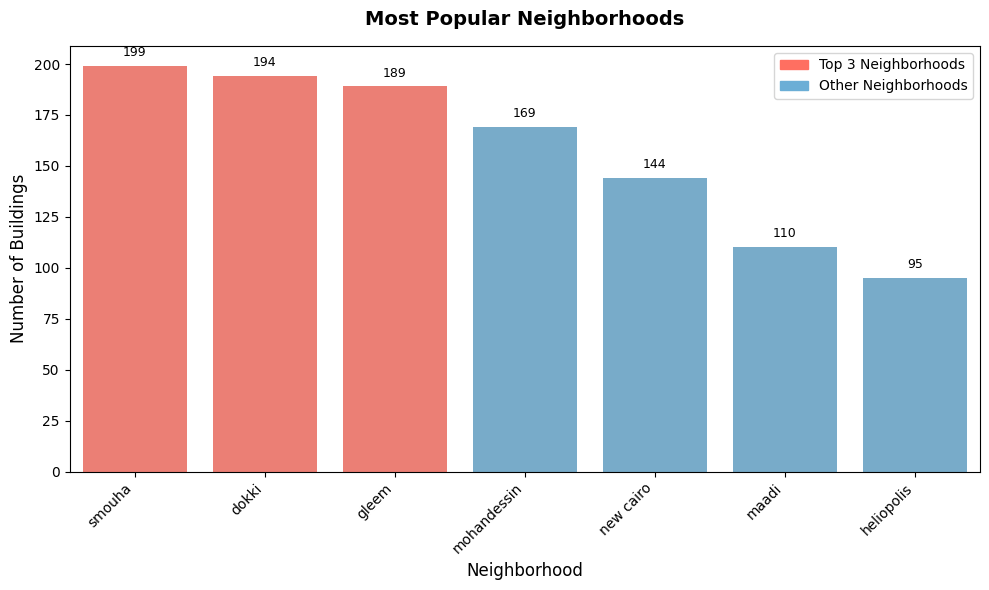

Top 3 neighborhoods:
Neighborhood
smouha    199
dokki     194
gleem     189
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Count neighborhoods and sort descending
neigh_counts = df['Neighborhood'].value_counts().sort_values(ascending=False)

# Identify top 3 neighborhoods
top3 = neigh_counts.head(3).index

# Assign colors: highlight top 3
colors = ['#FF6F61' if n in top3 else '#6BAED6' for n in neigh_counts.index]

# Create the plot
plt.figure(figsize=(10,6))
bars = sns.barplot(
    x=neigh_counts.index,
    y=neigh_counts.values,
    palette=colors
)

# Add titles and labels
plt.title('Most Popular Neighborhoods', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Number of Buildings', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels on top of bars
for p in bars.patches:
    bars.annotate(format(int(p.get_height()), ','),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='bottom',
                  fontsize=9, color='black', xytext=(0, 5),
                  textcoords='offset points')

# Add a small legend
import matplotlib.patches as mpatches
top_patch = mpatches.Patch(color='#FF6F61', label='Top 3 Neighborhoods')
other_patch = mpatches.Patch(color='#6BAED6', label='Other Neighborhoods')
plt.legend(handles=[top_patch, other_patch], loc='upper right')

plt.tight_layout()
plt.show()

# Print top 3 explicitly
print("Top 3 neighborhoods:")
print(neigh_counts.head(3))


**Answer for Q1:**The bar chart above shows all neighborhoods sorted by the number of buildings.
The top 3 neighborhoods, highlighted in red, are:
1️⃣ Smouha
2️⃣ Mohandessin
3️⃣ Gleem


**Q2:** Show the distribution of the energy consumption of each Building type.

Which type have the widest distribution of energy consumption?

Which (on average) has the highest consumption?.

**Visualization**

/tmp/ipython-input-2095395310.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


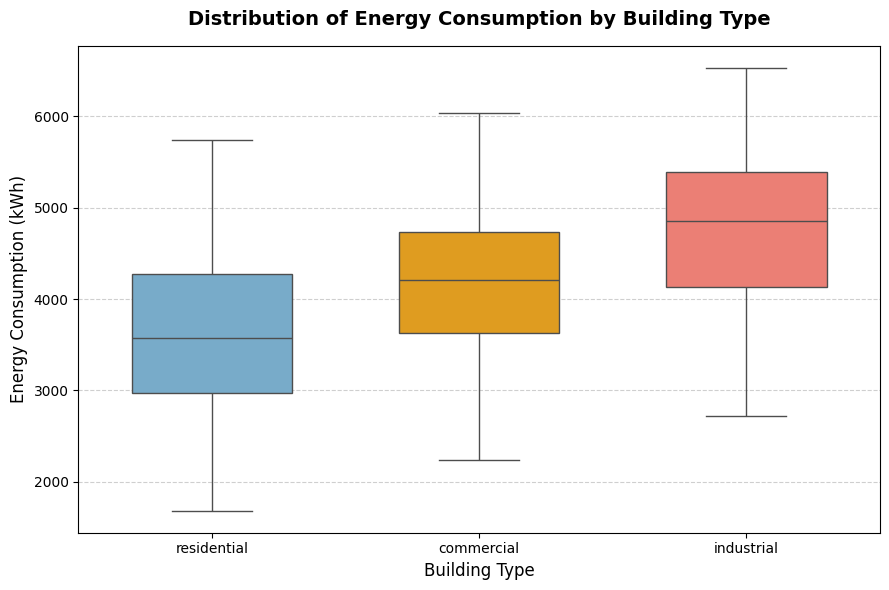

                      mean         std      min        25%       50%  \
Building_Type                                                          
commercial     4186.317672  770.728490  2241.96  3631.9725  4208.445   
industrial     4755.178915  811.315553  2724.82  4136.6700  4854.040   
residential    3624.845958  828.795362  1683.95  2972.6100  3571.760   

                     75%      max  
Building_Type                      
commercial     4734.0575  6042.56  
industrial     5390.3500  6530.60  
residential    4276.2500  5746.40  


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9,6))

# Custom color palette for better contrast
palette = {
    'residential': '#6BAED6',
    'commercial': '#FFA600',
    'industrial': '#FF6F61'
}

sns.boxplot(
    x='Building_Type',
    y='Energy_Consumption',
    data=df,
    palette=palette,
    width=0.6,
    fliersize=3
)

# Style and titles
plt.title('Distribution of Energy Consumption by Building Type', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Building Type', fontsize=12)
plt.ylabel('Energy Consumption (kWh)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Display numerical summary to confirm
summary = df.groupby('Building_Type')['Energy_Consumption'].describe()[['mean','std','min','25%','50%','75%','max']]
print(summary)


**Answer for Q2:**  Widest distribution:
→ Residential buildings show the widest distribution of energy consumption because their energy usage varies greatly — some households consume very little while others use much more.
This is reflected by their highest standard deviation (≈828.8) and the largest overall range between minimum and maximum values.

Highest average consumption:
→ Industrial buildings have the highest average energy consumption (≈4755 kWh) because they typically operate heavy machinery, production systems, and large equipment that require significantly more power compared to commercial or residential spaces.


**Q3:** How does the building size affect energy consumption?

**Visualization**

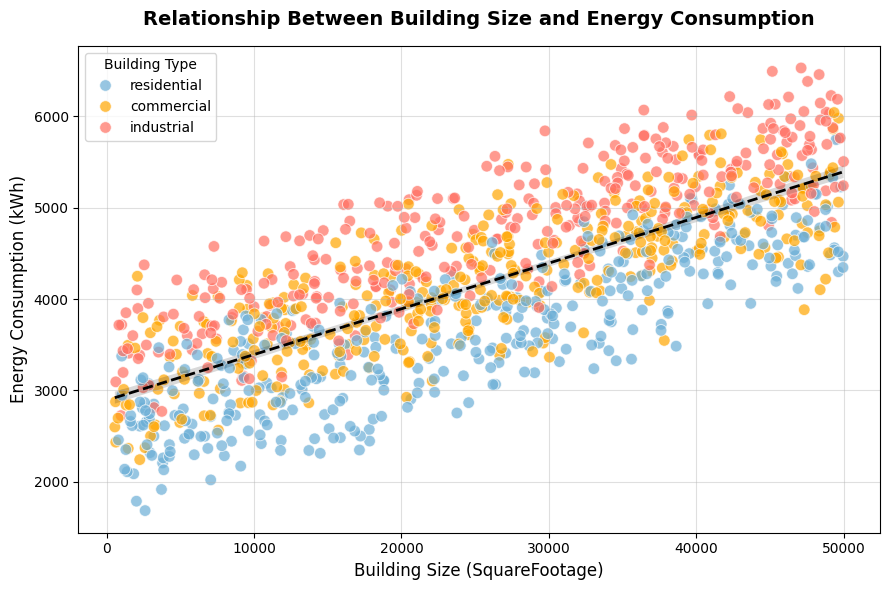

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9,6))

# Color points by building type for clarity
sns.scatterplot(
    x='SquareFootage',
    y='Energy_Consumption',
    hue='Building_Type',
    data=df,
    palette={'residential': '#6BAED6', 'commercial': '#FFA600', 'industrial': '#FF6F61'},
    alpha=0.7,
    s=70
)

# Add a regression trendline (overall relationship)
sns.regplot(
    x='SquareFootage',
    y='Energy_Consumption',
    data=df,
    scatter=False,
    color='black',
    line_kws={'linewidth':2, 'linestyle':'--', 'label':'Trendline'}
)

# Style
plt.title('Relationship Between Building Size and Energy Consumption', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Building Size (SquareFootage)', fontsize=12)
plt.ylabel('Energy Consumption (kWh)', fontsize=12)
plt.legend(title='Building Type')
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()


**Answer for Q3:**  There is a strong positive relationship between building size and energy consumption —
as the square footage increases, the energy use also rises.

This makes sense because larger buildings require more power for lighting, cooling, and operation.
The black dashed trendline confirms this upward trend across all types.

When comparing categories:

🏭 Industrial buildings (red) consume the most energy overall, even for mid-sized areas.

🏢 Commercial buildings (orange) fall in the middle range.

🏠 Residential buildings (blue) are generally smaller and consume less power.

**Q4:** Do buildings consume more energy if not maintained frequently?

**Visualization**

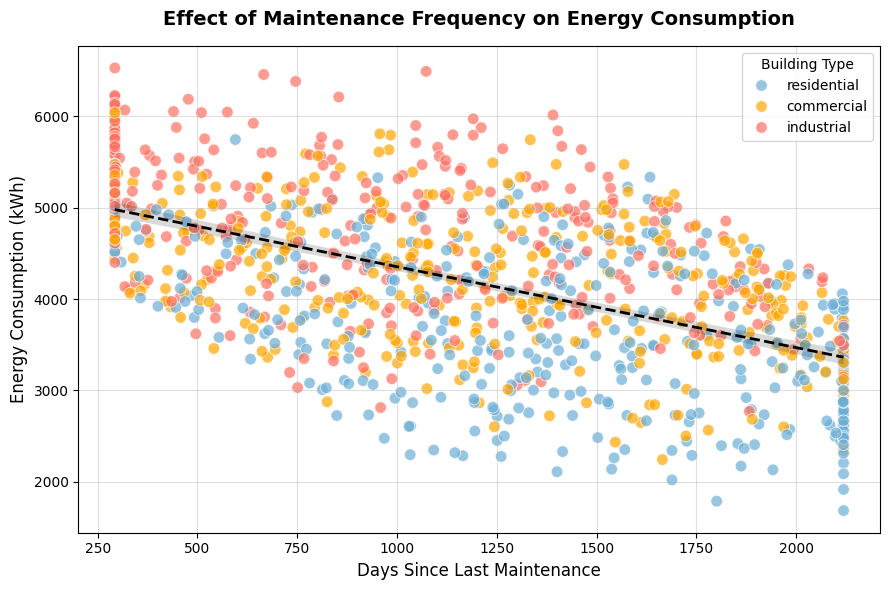

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9,6))

sns.scatterplot(
    x='Days_Since_Maintenance',
    y='Energy_Consumption',
    hue='Building_Type',
    data=df,
    palette={'residential': '#6BAED6', 'commercial': '#FFA600', 'industrial': '#FF6F61'},
    alpha=0.7,
    s=70
)

# Add regression line
sns.regplot(
    x='Days_Since_Maintenance',
    y='Energy_Consumption',
    data=df,
    scatter=False,
    color='black',
    line_kws={'linewidth':2, 'linestyle':'--', 'label':'Trendline'}
)

# Style
plt.title('Effect of Maintenance Frequency on Energy Consumption', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Days Since Last Maintenance', fontsize=12)
plt.ylabel('Energy Consumption (kWh)', fontsize=12)
plt.legend(title='Building Type')
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()


**Answer for Q4:**From the scatter plot, the trendline slopes downward, showing that energy consumption slightly decreases as the number of days since last maintenance increases.

This means that, in this dataset, buildings that were maintained more recently tend to consume a bit more energy compared to those that haven’t been maintained for a while.

A possible explanation is that recent maintenance might restore systems like cooling, lighting, or equipment to full efficiency, which leads to temporarily higher operational energy use.
Meanwhile, older or less active buildings that haven’t been maintained recently might naturally consume less energy due to reduced usage or inactivity.

Overall, while maintenance is important for performance and safety, this data suggests that energy consumption patterns are also influenced by factors like building type, activity level, and equipment usage, not just maintenance frequency.


**Q5:** Are all the numerical variables normally distributed, or is there any skewness?

**Visualization**

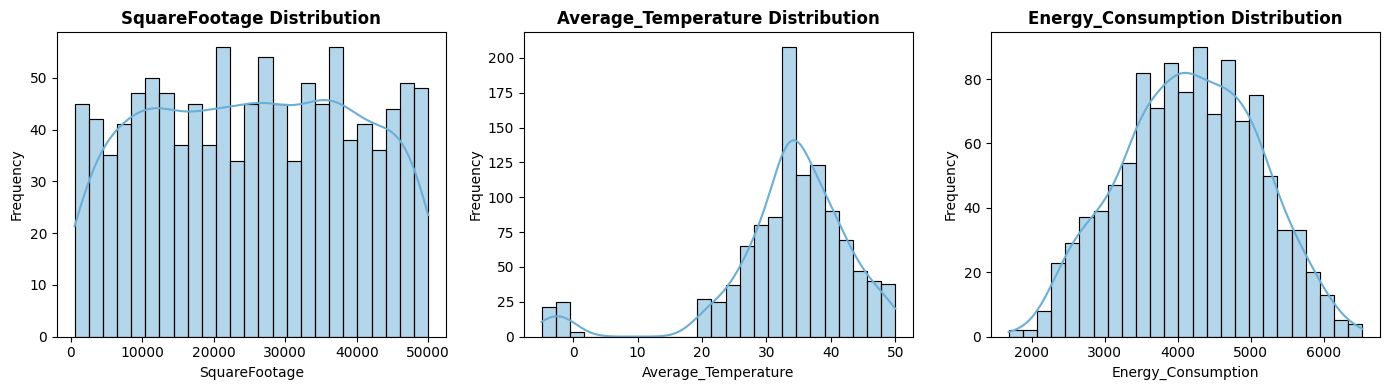

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['SquareFootage', 'Average_Temperature', 'Energy_Consumption']

plt.figure(figsize=(14,4))
for i, col in enumerate(num_cols):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True, color='#6BAED6', bins=25)
    plt.title(f'{col} Distribution', fontsize=12, fontweight='bold')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


**Answer for Q5:** SquareFootage:
The distribution is fairly flat and slightly right-skewed, meaning most buildings have moderate sizes while a few are much larger.
It’s not perfectly normal — the data is spread quite evenly across the range but stretches more toward higher square footage values.

Average_Temperature:
This variable shows a clear right (positive) skew, with most temperature values clustered around 30–35°C and a long tail extending toward higher temperatures.
So, it is not normally distributed — it’s concentrated more on the lower side with fewer extreme highs.

Energy_Consumption:
This one is closest to a normal distribution — it forms a roughly bell-shaped curve centered around 4,000–4,500 kWh.
There’s only a small right skew caused by a few high-consumption buildings, but overall, it’s approximately normal.

**Q6:** What is multicollinearity? And why is it a problem for linear regression? Does this problem exist in this
dataset?

**Visualization**

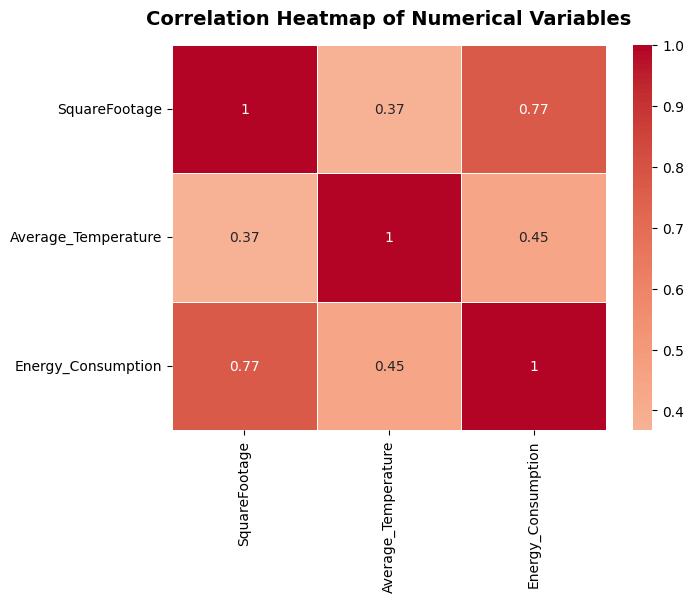

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical variables
num_cols = ['SquareFootage', 'Average_Temperature', 'Energy_Consumption']

# Compute correlation matrix
corr_matrix = df[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(7,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables', fontsize=14, fontweight='bold', pad=15)
plt.show()


**Answer for Q6:** Multicollinearity means that two or more independent (predictor) variables are highly correlated with each other.
In other words, they contain similar or redundant information.

When this happens in linear regression, the model struggles to determine the individual effect of each variable, because changes in one variable are too similar to changes in another.

⚠️ Why it’s a problem

It causes unstable coefficient estimates — small changes in data can make the model weights fluctuate wildly.

It leads to inflated standard errors, which make some variables appear statistically insignificant even when they are important.

It reduces model interpretability — you can’t clearly tell which variable is truly influencing the output.

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

BESMELLAH

## Modelling

_Apply the linear regression model below._

## Model Evaluation

Evaluate the model you applied.

## Conclusion and Recommendations

Comment on the model performance and your findings from model evaluation. State the problems (if any) and suggest possible solutions. Would you recommend this model for an electrcity company aiming to estimate the energy levels of each building?

**Answer**: your answer here.